<a href="https://colab.research.google.com/github/arina19-2000/unimi/blob/main/ABSA/textsent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random exercises

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# apply the vectorizer to the para
X = vectorizer.fit_transform(nltk_sent_para)

# display the document-term matrix as a dataframe to show the tokens


vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [ ]:
docterm

,and,are,at,be,but,can,char,characters,drawback,exclamation,...,that,the,time,to,tokenization,use,used,we,with,won
0,1,1,0,0,0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,0
1,0,0,1,0,1,1,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [ ]:
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia('en')

page = wiki_wiki.page('Natural language processing')
print(page.text)

ModuleNotFoundError: No module named 'wikipediaapi'

Data upload

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("jordiclive/FABSA")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/7930 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1057 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1587 [00:00<?, ? examples/s]

In [ ]:
print(ds)


DatasetDict({
    train: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 7930
    })
    validation: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 1057
    })
    test: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 1587
    })
})


In [ ]:
import pandas as pd

df = pd.DataFrame(ds['train'])

In [ ]:
df.head()

,id,org_index,data_source,industry,text,labels,label_codes
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan..."
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp..."
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1']
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc..."
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1']


In [ ]:
df.shape

(7930, 7)

In [ ]:
df['industry'].value_counts()

,count
industry,
Fashion,2161
Price Comparison,1157
Groceries,1021
Trading,1021
Travel Booking,973
Banking,913
Ride Hailing,383
Information Technology,141
Consulting,81


In [ ]:
dff = df[df['industry']=='Fashion']

In [ ]:
dff.head(20)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['data_source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='id', y='data_source', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

,id,org_index,data_source,industry,text,labels,label_codes
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc..."
5,301979193,616,Apple Store,Fashion,Not all reviews are showing. When it says: thi...,"[[Company brand: Reviews, negative], [Online e...","['company-brand.reviews.-1', 'online-experienc..."
8,301988812,727,Google Play,Fashion,"Great service, easy returns, friendly people.","[[Staff support: Attitude of staff, positive],...","['staff-support.attitude-of-staff.1', 'purchas..."
10,301978802,616,Apple Store,Fashion,Very clear,"[[Purchase booking experience: Ease of use, po...",['purchase-booking-experience.ease-of-use.1']
11,301987981,727,Google Play,Fashion,Always great! Whether app or a person.,"[[Online experience: App website, positive], [...","['online-experience.app-website.1', 'company-b..."
15,301985269,727,Google Play,Fashion,Easy to use,"[[Purchase booking experience: Ease of use, po...",['purchase-booking-experience.ease-of-use.1']
22,301986273,616,Google Play,Fashion,Unclear navigation among promotions,"[[Purchase booking experience: Ease of use, ne...","['purchase-booking-experience.ease-of-use.-1',..."
28,301988464,727,Google Play,Fashion,The app is great for fast and easy check out's...,"[[Value: Discounts promotions, positive], [Pur...","['value.discounts-promotions.1', 'purchase-boo..."
32,301982361,727,Google Play,Fashion,Easy to use,"[[Purchase booking experience: Ease of use, po...",['purchase-booking-experience.ease-of-use.1']
33,301973353,616,Trustpilot,Fashion,The request has been a disaster. I ordered two...,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1']


In [ ]:
dff.shape

(2161, 7)

1. Data cleaning
2. Lemmatization
3. Word2vec or TF-IDF

born vs. SVM, Logreg

Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
spell = SpellChecker()
stop_words = set(stopwords.words('english'))

def clean(text):
    """
    removing URLs, HTML tags, special characters, and digits.
    """
    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

def normalize(text):
    """
    converting text to lowercase.
    """
    return text.lower()

# def spelling(text):
#     """
#     fix typos, missplellings.
#     """
#     corrected_text = []
#     for word in text.split():
#         correction = spell.correction(word)
#         if correction is None:
#             corrected_text.append(word)  # Use the original word if no correction is found
#         else:
#             corrected_text.append(correction)  # Use the corrected word
#     return ' '.join(corrected_text)

def lemmatize(text):
    """
    lemmatize w/NLTK WordNetLemmatizer.
    """
    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize each word and remove stop words
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])

    return lemmatized_text

def preprocess(text):
    """
    perform all.
    """
    text = clean(text)
    # text = spelling(text)
    text = normalize(text)
    text = lemmatize(text)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Spelling corrections have distorted some words' meaning.

In [ ]:
dff.loc[:, 'clean'] = dff['text'].apply(preprocess)



In [ ]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc...",worst app ordered sneaker week ago still haven...,16
5,301979193,616,Apple Store,Fashion,Not all reviews are showing. When it says: thi...,"[[Company brand: Reviews, negative], [Online e...","['company-brand.reviews.-1', 'online-experienc...",review showing say article review sometimes no...,15
8,301988812,727,Google Play,Fashion,"Great service, easy returns, friendly people.","[[Staff support: Attitude of staff, positive],...","['staff-support.attitude-of-staff.1', 'purchas...",great service easy return friendly people,6
10,301978802,616,Apple Store,Fashion,Very clear,"[[Purchase booking experience: Ease of use, po...",['purchase-booking-experience.ease-of-use.1'],clear,1
11,301987981,727,Google Play,Fashion,Always great! Whether app or a person.,"[[Online experience: App website, positive], [...","['online-experience.app-website.1', 'company-b...",always great whether app person,5


<ipython-input-39-d9b5b488d677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["tokens"] = dff["clean"].apply(lambda x: len(x.split()))


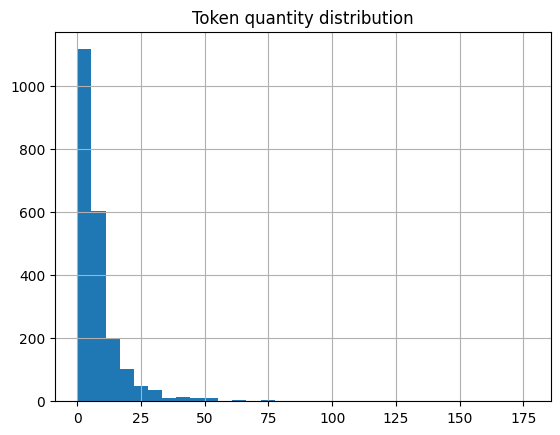

In [ ]:
from matplotlib import pyplot as plt
dff["tokens"] = dff["clean"].apply(lambda x: len(x.split()))
dff["tokens"].hist(bins=32)
plt.title("Token quantity distribution");

In [52]:
from nltk.tokenize import word_tokenize
def word_tokenizer(text):
    return word_tokenize(text) if isinstance(text, str) else []

dff['clean2'] = dff['clean'].progress_map(word_tokenizer)

100%|██████████| 2161/2161 [00:00<00:00, 5502.86it/s]
<ipython-input-52-e43ac067d8d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['clean2'] = dff['clean'].progress_map(word_tokenizer)


In [53]:
dff.head()

,id,org_index,data_source,industry,text,label_codes,clean,tokens,clean2,sentiments
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"['logistics-rides.speed.-1', 'online-experienc...",worst app ordered sneaker week ago still haven...,16,"[worst, app, ordered, sneaker, week, ago, stil...","negative, negative, negative"
5,301979193,616,Apple Store,Fashion,Not all reviews are showing. When it says: thi...,"['company-brand.reviews.-1', 'online-experienc...",review showing say article review sometimes no...,15,"[review, showing, say, article, review, someti...","negative, negative"
8,301988812,727,Google Play,Fashion,"Great service, easy returns, friendly people.","['staff-support.attitude-of-staff.1', 'purchas...",great service easy return friendly people,6,"[great, service, easy, return, friendly, people]","positive, positive, positive"
10,301978802,616,Apple Store,Fashion,Very clear,['purchase-booking-experience.ease-of-use.1'],clear,1,[clear],positive
11,301987981,727,Google Play,Fashion,Always great! Whether app or a person.,"['online-experience.app-website.1', 'company-b...",always great whether app person,5,"[always, great, whether, app, person]","positive, positive"


In [51]:
dff.head()

,id,org_index,data_source,industry,text,label_codes,clean,tokens,clean2,sentiments
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"['logistics-rides.speed.-1', 'online-experienc...",worst app ordered sneaker week ago still haven...,16,"[worst, app, ordered, sneaker, week, ago, stil...","negative, negative, negative"
5,301979193,616,Apple Store,Fashion,Not all reviews are showing. When it says: thi...,"['company-brand.reviews.-1', 'online-experienc...",review showing say article review sometimes no...,15,"[review, showing, say, article, review, someti...","negative, negative"
8,301988812,727,Google Play,Fashion,"Great service, easy returns, friendly people.","['staff-support.attitude-of-staff.1', 'purchas...",great service easy return friendly people,6,"[great, service, easy, return, friendly, people]","positive, positive, positive"
10,301978802,616,Apple Store,Fashion,Very clear,['purchase-booking-experience.ease-of-use.1'],clear,1,[clear],positive
11,301987981,727,Google Play,Fashion,Always great! Whether app or a person.,"['online-experience.app-website.1', 'company-b...",always great whether app person,5,"[always, great, whether, app, person]","positive, positive"


In [ ]:
pip install bornrule


In [ ]:
from bornrule import BornClassifier
